# CMM 262: Introduction to Statistics, Day 2/2 (Distributions and Hypothesis Testing)

## Notebook Information

Now that we have some experience in data visualization and generating summary statistics, we'll continue with learning about different probability distributions and hypothesis testing. Again, I've re-adapted this lesson in **Python** instead of R for this year, and you can find the 2025 R programming language iteration from Graham [here](https://github.com/biom262/bnfo262-2025/blob/main/module-2-statistics/Day2_Distributions_CentralLimit_HypothesisTesting.Rmd).

### Contributors

* **Clarence Mah**, Ph.D. (CMM 262, 2020-2021)
* **Michelle Franc Ragsac**, Ph.D. (CMM 262, 2020-2021, 2026)
* **Graham McVicker**, Ph.D. (CMM 262, 2022-2024)

## Dataset Background

We'll be going through the **Palmer Penguins** dataset from [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/) again in this Jupyter Notebook. We'll be using the [upload somebody made to GitHub Gists](https://gist.github.com/slopp/ce3b90b9168f2f921784de84fa445651) that I put in the `data/` directory for this module.

## Notebook Dependencies

In addition to the packages that we imported in the previous lesson, we'll be importing the `scipy` and `numpy` packages. While you may be familiar with these two packages, I provided a brief background of what they are typically used for below:

> The [`numpy`](https://numpy.org/) package adds support for large, multi-dimensional arrays and matrices to Python, along with many high-level mathematical functions to perform computations on those arrays.
>
> The [`scipy`](https://scipy.org/) package contains modules for optimization, linear algebra, integration, and statistics! In this notebook, we'll primarily be using the `scipy.stats` module for statistical computations.

### Importing Packages of Interest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The new additions for this week!
import numpy as np
import scipy.stats as stats

---

## Exercise 1: Discrete Distributions

### Plotting the Probability Mass Function (PMF) for the Binomial Distribution

The `scipy` package's `stats` module has many functions for working with various types of probability distributions. Depending on what you're working on, I highly suggest [reading the documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to see if there's support for the particular calculations you're interested in.

<div class="alert alert-block alert-info">
<b>Info: Limitations to the <code>scipy.stats</code> Module</b>
    <p></p>
    <p>While <code>scipy.stats</code> is powerful and has implementations for many different types of calculations for various probability distributions, the package is limited in some respects, which they mention on their website. Fortunately, they provide recommendations for other packages to use depending on the type of calculations you're interested in:</p>
    <ul>
        <li><a href="https://www.statsmodels.org/stable/index.html">While <code>scipy.stats</code> has functionality for regression modeling, <code>statsmodels</code></a> is another Python package that is better suited for more advanced regression models, linear models, and time series analysis. <code>statsmodels</code> has some overlap with the functionalities offered by <code>scipy.stats</code>, but takes things a step further, while also mirroring more of the syntax used in the R programming language!</li>
        <li><a href="https://scikit-learn.org/stable/index.html"><code>scikit-learn</code></a> is a package more suited for machine learning classification, regression, and model selection as it has more sophisticated functions for unsupervised and supervised clustering of data, as well as cross-fold validation</li>
        <li><a href="https://www.pymc.io/welcome.html"><code>PyMC</code></a> is another package that is better suited for Bayesian statistical modeling and probabilistic machine learning, fitting models with Markov chain Monte Carlo (MCMC) or variational inference</li>
    </ul>
</div>

In this notebook, we'll cover the general notation for interacting with `scipy.stats` modules in the context of the **binomial distribution**. Luckily, other probability distributions implemented in `scipy.stats` follow similar notation and parameter structure, so what you learn here is transferrable to other methods! 

As a refresher, the binomial distribution describes the number of "successes" ($k$) observed from $n$ Bernoulli trials (i.e., imagine coin flips), and the formula for the binomial **probability mass function (PMF)** can be represented as:

$$ f(k) = {n \choose k} p^k (1-p)^{n-k} $$

To start off this notebook, let's learn how to model the binomial PMF and plot the values of the binomial PMF with the following parameters: $n=10$ and $p=0.1$.

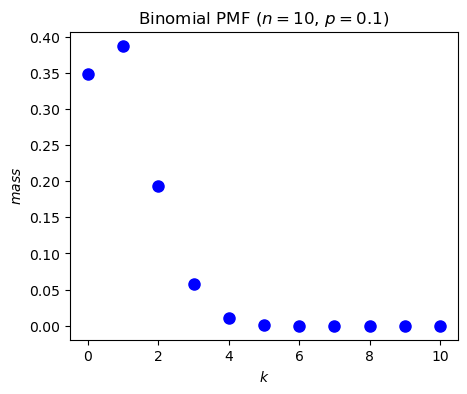

In [2]:
# TODO
# ...

# ------------
# Answer
# ------------
n = 10 # number of independent trials
k = np.arange(0, n+1, 1) # observed value of the random variable (number of successes)
p = 0.1 # probability
y = stats.binom.pmf(k, n, p) # random variable counting the number of successes accross n trials

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(k, y, "bo", markersize=8)
ax.set_title(f"Binomial PMF ($n={n}$, $p={p}$)")
ax.set_xlabel("$k$")
ax.set_ylabel("$mass$")

plt.show()

With that preview of how to calculate the PMF for different values of $k$, it's your turn to try things out!

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #1: Plotting the Binomial Probability Mass Function</b>
    <p></p>
    <p>Generate a plot depicting the binomial probability mass function (PMF) for <font face="Latin Modern">n = 15</font> and <font face="Latin Modern">p = 0.5</font>.</p>
</div>

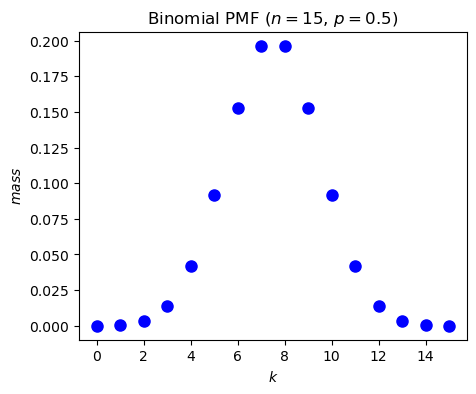

In [3]:
# TODO
# ...

# ------------
# Answer
# ------------
n = 15
k = np.arange(0, n+1, 1)
p = 0.5
y = stats.binom.pmf(k, n, p)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(k, y, "bo", markersize=8)
ax.set_title(f"Binomial PMF ($n={n}$, $p={p}$)")
ax.set_xlabel("$k$")
ax.set_ylabel("$mass$")

plt.show()

### Sampling from the Binomial Distribution ($n=15$, $p=0.5$)

Sampling from a distribution lets you simulate data to understand variability, uncertainty, and the expected behavior of a process when collecting real data may be expensive, limited, or impossible. With sampling from the binomial distribution, you can imagine that we're trying to approximate theoretical results by performing repeated random coin flips with the parameters in the previous Interactive Exercise ($n=15$, $p=0.5$) with the computer rather than doing those flips ourselves!

In the next code cell, we can try sampling from our distirbution 100 times and plot the results as a histogram--but lets do it multiple times and see how the distribution changes!

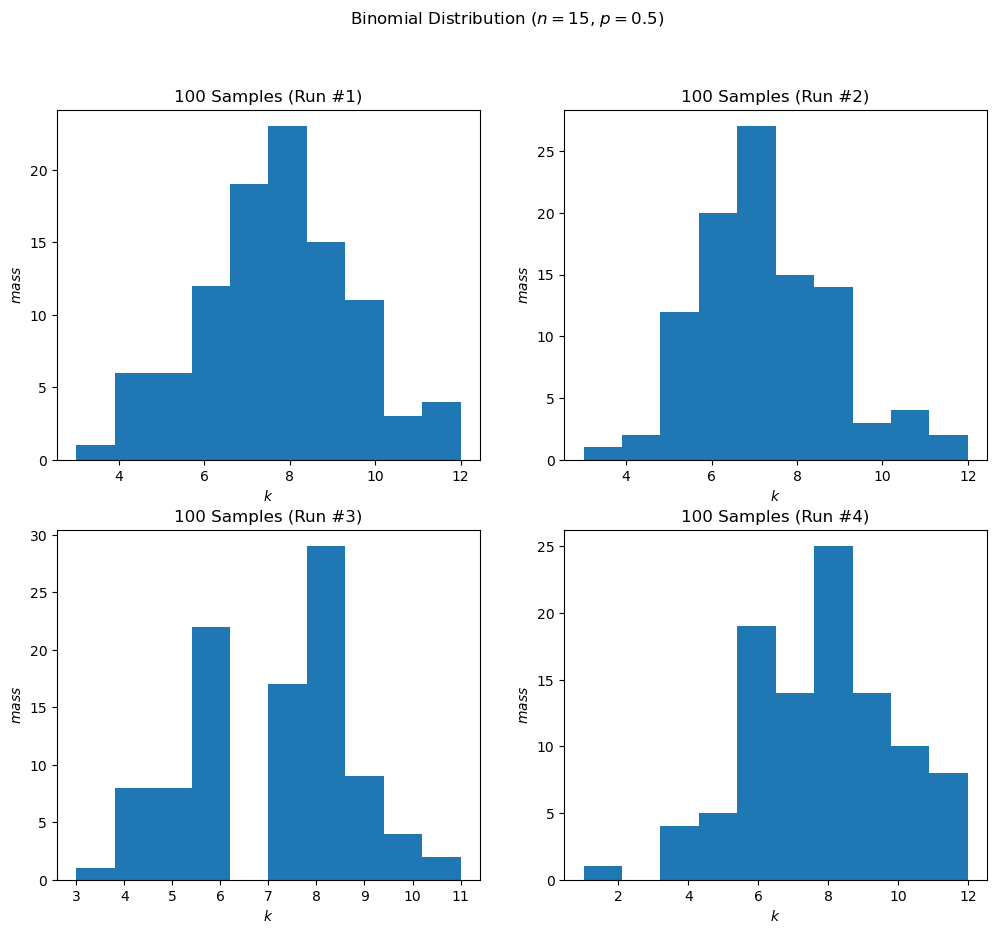

In [4]:
# TODO
# ...

# ----------------------------------------
# Answer
# ----------------------------------------
n = 15
p = 0.5
num_samples = 100

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
axs = ax.flatten()

for i in range(4):
    # Grab 100 random samples
    r = stats.binom.rvs(n, p, size=num_samples) # rvs: random variables

    # Next, we can plot this set of samplings that we just grabbed
    axs[i].hist(r)
    axs[i].set_title(f"{num_samples} Samples (Run #{i+1})")
    axs[i].set_xlabel("$k$")
    axs[i].set_ylabel("$mass$")

plt.suptitle(f"Binomial Distribution ($n={n}$, $p={p}$)")

plt.show()

### The Binomial Distribution in Practice: The Palmer Penguins Dataset

Now that we know how to use the `scipy.stats` module to model the binomial distribution (i.e., calculate the PMF for different values of $n$, $k$, and $p$ parameters) as well as sample from the distribution (i.e., with the `stats.binom.rvs()` function), let's dive into a practical application of probability distributions.

The Palmer Penguins dataset we used in the previous lecture contains `sex` information (i.e., `male` and `female`) for our penguins! In this portion of the notebook, we will try and model the theoretical distribution of `sex` in our population and compare it to what we observe in our sample set.

First, let's see how many `male` penguins we have in our sample.

In [5]:
# TODO
# ...

# -----------------------------------
# Answer
# -----------------------------------
# Import the dataset from the data/ directory
df = pd.read_csv("data/penguins.csv", index_col=0)

# Remove penguins that do not have any sex information
df_subset = df.dropna(subset="sex")

# Determine the counts of number of male versus female penguins
vc = df_subset["sex"].value_counts()
num_m = vc["male"]
num_f = vc["female"]
num_t = num_m + num_f

# Print the results
print(f"# Male   Penguins : {num_m}")
print(f"# Female Penguins : {num_f}")
print(f"# Total  Penguins : {num_t} Total")

# Male   Penguins : 168
# Female Penguins : 165
# Total  Penguins : 333 Total


<div class="alert alert-block alert-warning">
<b>Interactive Exercise #2: Probability of Encountering Male Penguins in the Palmer Penguins Dataset</b>
    <p></p>
    <p>Assuming that the probability of encountering a <code>male</code> penguin is 50%, what is the probability of observing <b>exactly this number</b> of <code>male</code> penguins within our sample? (<i>Hint</i>: You can use the <code>stats.biom.pmf()</code> function with our parameters).</p>
</div>

In [6]:
# TODO
# ...

# ------------------------------
# Answer
# ------------------------------
p = 0.5
stats.binom.pmf(num_m, num_t, p)

np.float64(0.043106281843854385)

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #3: Plotting the Binomial Probability Mass Function with the Palmer Penguin Parameters</b>
    <p></p>
    <p>Generate a plot depicting the binomial probability mass function (PMF) for <font face="Latin Modern">n = total number of penguins</font> and <font face="Latin Modern">p = 0.5</font> to model the PMF for our population of penguins.</p>
</div>

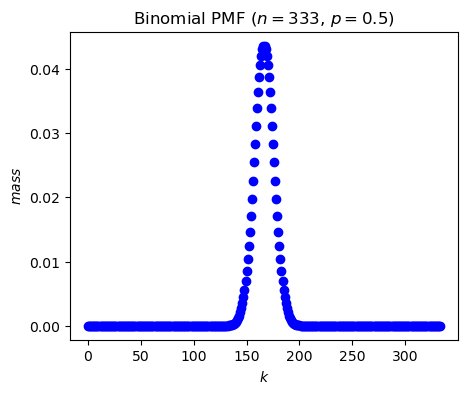

In [7]:
# TODO
# ...

# ------------------------------------------
# Answer
# ------------------------------------------
n = num_t
k = np.arange(0, n + 1, 1)
p = 0.5
y = stats.binom.pmf(k, n, p)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(k, y, "bo")
ax.set_title(f"Binomial PMF ($n={num_t}$, $p=0.5$)")
ax.set_xlabel("$k$")
ax.set_ylabel("$mass$")

plt.show()

Is it surprising that we observed the number of `male` penguins that we did? How might we test this?

---

## Exercise 2: The Central Limit Theorem

As mentioned previously, the Central Limit Theorem states that for large enough sample sizes, the sampling distribution of sample means tends to be normally distributed *regardless* of the underlying probability distribution of the population. We will spend this portion of the notebook digging into this concept a little deeper!

### Modeling Body Mass in the Palmer Penguins Dataset

Let's assume that the entire population of penguins are the ones in the Palmer Penguins dataset, and that we are only able to obtain small samples of penguins for research purposes. For this portion of the notebook, we are going to focus on the `body_mass_g` of the penguins, so firstly, let's limit ourselves to the set of penguins for which we have a measurement of this trait.

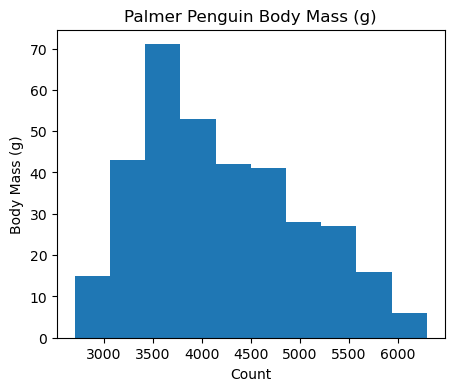

In [8]:
# TODO
# ...

# -----------------------------------------
# Answer
# -----------------------------------------
df_subset = df.dropna(subset="body_mass_g")

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(df_subset["body_mass_g"])
ax.set_title("Palmer Penguin Body Mass (g)")
ax.set_xlabel("Count")
ax.set_ylabel("Body Mass (g)")

plt.show()

When we look at this plot, it doesn't really look normally distributed. But that's alright! Let's dig a little deeper and figure out what the population mean is here.

In [9]:
# TODO
# ...

# -----------------------------
# Answer
# -----------------------------
df_subset["body_mass_g"].mean()

np.float64(4201.754385964912)

Now, let's pretend that our study is not very well funded due to budget cuts. Therefore, we are only able to sample and weigh $n=10$ penguins from the population during each of our arctic expeditions. 

Let's determine the mean of our sample set!

In [10]:
# TODO
# ...

# -----------------------------
# Answer
# -----------------------------
num_samples = 10
sample_mass = df_subset["body_mass_g"].sample(num_samples)
sample_mass.mean()

np.float64(4597.5)



As mentioned previously, the Central Limit Theorem states that sample means taken in this way should be normally distributed around the true population mean, and that this distribution should have a standard deviation equal to the population standard deviation.

Let's test this idea out by repeating our sampling process 1,000 more times and then looking at the resulting distribution of sample means. Then, we can visualize this result as a histogram to evaluate the distribution.


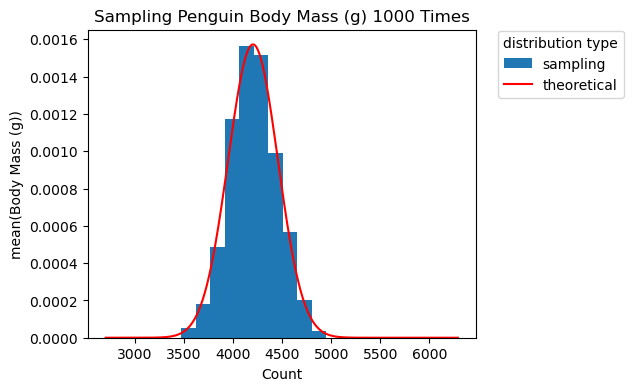

In [11]:
# TODO
# ...

# -----------------------------------------------------------
# Answer
# -----------------------------------------------------------
num_samples = 10
sample_means = []

num_samplings = 1000
for i in range(num_samplings):
    sample_mass = df_subset["body_mass_g"].sample(num_samples)
    sample_means.append(sample_mass.mean())

# Determine theoretical distribution
se = df_subset["body_mass_g"].std() / (num_samples ** (1/2))
x = np.arange(df_subset["body_mass_g"].min(), df_subset["body_mass_g"].max(), 10)
y = stats.norm.pdf(x, loc=df_subset["body_mass_g"].mean(), scale=se)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(sample_means, density=True, label="sampling") 
ax.set_title(f"Sampling Penguin Body Mass (g) {num_samplings} Times")
ax.set_xlabel("Count")
ax.set_ylabel("mean(Body Mass (g))")

ax.plot(x, y, "r-", label="theoretical")

ax.legend(title="distribution type", loc="upper right", bbox_to_anchor=(0.9, 0.52, 0.5, 0.5))

plt.show()

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #3: Modeling Body Mass in the Palmer Penguins Dataset</b>
    <p></p>
    <p>Say we had a larger research budget, allowing us to sample 40 penguins during each expedition! Generate a plot to depict the results of sampling the body mass of penguins over 1,000 expeditions and compare it to the theoretical distribution. How does the standard error change with this increase in sampling size?</p>
</div>

Old Standard Error with Sampling 10 Penguins : 253.6002912708792
(Standard Error = 801.9545356980955 / sqrt(10))

New Standard Error with Sampling 40 Penguins : 126.8001456354396
(Standard Error = 801.9545356980955 / sqrt(40))


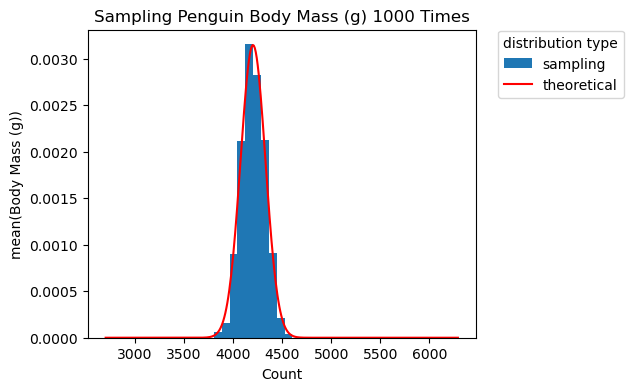

In [12]:
# TODO
# ...

# -----------------------------------------------------------
# Answer
# -----------------------------------------------------------
num_samples_new = 40
sample_means = []

num_samplings = 1000
for i in range(num_samplings):
    sample_mass = df_subset["body_mass_g"].sample(num_samples_new)
    sample_means.append(sample_mass.mean())

# Determine theoretical distribution
se_new = df_subset["body_mass_g"].std() / (num_samples_new ** (1 / 2))
x = np.arange(df_subset["body_mass_g"].min(), df_subset["body_mass_g"].max(), 10)
y = stats.norm.pdf(x, loc=df_subset["body_mass_g"].mean(), scale=se_new)

print(f"Old Standard Error with Sampling 10 Penguins : {se}")
print(f"(Standard Error = {float(df_subset['body_mass_g'].std())} / sqrt({num_samples}))")
print("")
print(f"New Standard Error with Sampling 40 Penguins : {se_new}")
print(f"(Standard Error = {float(df_subset['body_mass_g'].std())} / sqrt({num_samples_new}))")

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(sample_means, density=True, label="sampling")
ax.set_title(f"Sampling Penguin Body Mass (g) {num_samplings} Times")
ax.set_xlabel("Count")
ax.set_ylabel("mean(Body Mass (g))")

ax.plot(x, y, "r-", label="theoretical")

ax.legend(
    title="distribution type", loc="upper right", bbox_to_anchor=(0.9, 0.52, 0.5, 0.5)
)

plt.show()


## Exercise 3: Hypothesis Testing

Now that we evaluated the Central Limit Theorem in action, let's move to **hypothesis testing**! 

Hypothesis testing is a statistical framework for using sample data to evaluate claims about a population parameters (e.g., population mean). The Central Limit Theorem ensures that for sufficiently large samples, the sampling distribution of the test statistic is approximately Gaussian (*Normal*). This enables us to compute p-values and make probabilistic decisions even when the original data is not necessarily normally distributed.

### Analyzing Body Mass Differences between Species

In this section of the notebook, let's test whether the mass of `Adelie` and `Chinstrap` penguins differ. 

First, we can compute a z-score for the difference in the means of the two penguin species. The formula for that is:

$$ z = \frac{( \bar{x}_1 - \bar{x}_2 ) - ( \mu_1 - \mu_2 ) }{ \sqrt{ \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} } } $$


In [13]:
# TODO
# ...

# ---------------------------------------------------------
# Answer
# ---------------------------------------------------------
df_subset = df.dropna(subset="body_mass_g")

df_adelie = df_subset.loc[df_subset["species"] == "Adelie"]
adelie_avg = df_adelie["body_mass_g"].mean()
adelie_std = df_adelie["body_mass_g"].std()
adelie_num = df_adelie["body_mass_g"].count()

df_chinstrap = df_subset.loc[df_subset["species"] == "Chinstrap"]
chinstrap_avg = df_chinstrap["body_mass_g"].mean()
chinstrap_std = df_chinstrap["body_mass_g"].std()
chinstrap_num = df_chinstrap["body_mass_g"].count()

z = (adelie_avg - chinstrap_avg) / np.sqrt( (adelie_std ** 2)/adelie_num + (chinstrap_std ** 2)/chinstrap_num )
print(z)

-0.5430902472363278


Next, we can see what fraction of the normal distribution is to the left of this z-score and to the of this z-score multipled by `-1` to obtain the p-value. This distribution is symmetric, so technically, we can also multiply by `2` to get the proper result.

In [14]:
# TODO
# ...

# ----------------------------------------
# Answer
# ----------------------------------------
print("Left  of +z :", stats.norm.pdf(z))
print("Right of -z :", stats.norm.pdf(-z))
print("")

p_value = stats.norm.pdf(z) * 2
print(f"p-value for the Two-Sided Sample z-Test : {p_value}")

Left  of +z : 0.34424142822908116
Right of -z : 0.34424142822908116

p-value for the Two-Sided Sample z-Test : 0.6884828564581623


With this test, we fail to reject the null hypothesis as our $p > 0.05$. 

Let's try this again with the Welsh Two-Sample t-Test instead!

In [15]:
# TODO
# ...

# --------------------------------------------------------------------
# Answer
# --------------------------------------------------------------------
stats.ttest_ind(df_adelie["body_mass_g"], df_chinstrap["body_mass_g"])

TtestResult(statistic=np.float64(-0.5080869410660923), pvalue=np.float64(0.6119084581834857), df=np.float64(217.0))

The t-test statistic is very similar to the z-test statistic, therefore the p-values are also similar! t-tests are very similar to z-tests for large sample sizes ($n$). However, it is important to use t-tests instead of z-tests when sample sizes are small.

---

## Exercise 4: Correlation Tests and Linear Models

What if we want to quantify the relationship between two variables? One way to do this is with **correlation statistics**! Correlation statistics quantify the strength and direction of the association between two variables, indicating whether they tend to increase together, decrease together, or show no consistent linear relationship.

The most common measure is **Pearson's correlation coefficient ($r$)**, which captures linear dependence on a scale from `-1` to `+1`. 

Another common metric is **Spearman's correlation ($\rho$)**, which assesses *monotonic* relationships and is robust to non-normal measurements and outliers. (A monotonic relationship is a relationship between two variables in which one variable consistently moves in a single direction and the other consistently changes in the same or different direction; monotonic relationships can be irregular as long as the overall direction never reverses.)

In this last portion of the notebook, we will be testing whether or not `bill_length_mm` is correlated with `body_mass_g`. 

### Evaluating the Correlation Between Bill Length and Body Mass

First, let's generate a scatter plot to visualize the relationship between these two measurements.

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #4: Visualizing the Relationship Between Two Quantitative Variables</b>
    <p></p>
    <p>Generate a scatter plot to compare the relationship between <code>bill_length_mm</code> and <code>body_mass_g</code>, differentiating the points in the plot by penguin <code>species</code>.</p>
</div>

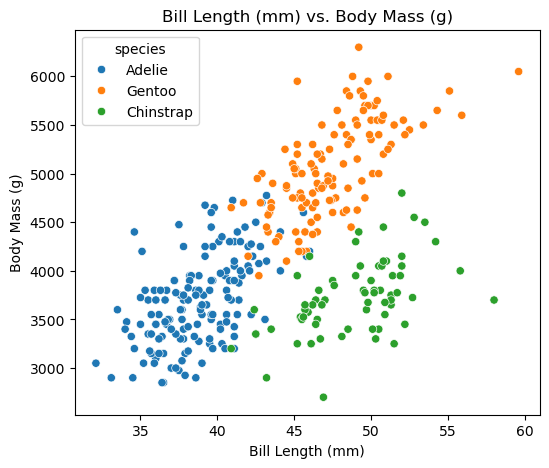

In [16]:
# TODO
# ...

# -------------------------------------------------------------
# Answer
# -------------------------------------------------------------
df_subset = df.dropna(subset=["bill_length_mm", "body_mass_g"])

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
g = sns.scatterplot(data=df_subset, x="bill_length_mm", y="body_mass_g", hue="species")
ax.set_title("Bill Length (mm) vs. Body Mass (g)")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Body Mass (g)")

plt.show()


Looking at the scatterplot, it seems like there is a relationship, but this relationship is different per species! For these next few code cells, let's focus on the `Gentoo` penguins.

# Gentoo Penguins : 123


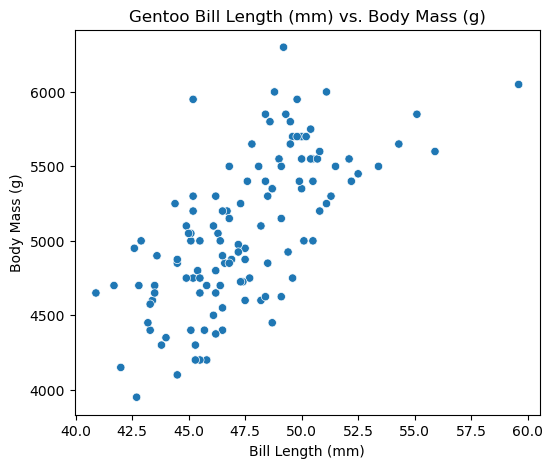

In [17]:
# TODO
# ...

# ---------------------------------------------------------
# Answer
# ---------------------------------------------------------
df_gentoo = df_subset.loc[df_subset["species"] == "Gentoo"]
print("# Gentoo Penguins :", df_gentoo.shape[0])

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
g = sns.scatterplot(data=df_gentoo, x="bill_length_mm", y="body_mass_g", hue="species", legend=False)
ax.set_title("Gentoo Bill Length (mm) vs. Body Mass (g)")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Body Mass (g)")

plt.show()


To calculate the correlation coefficient between these two variables, we can filter our `pandas` DataFrame to the columns of interest (e.g., `bill_length_mm` and `body_mass_g`), then use the built-in `pd.DataFrame.corr()` method to calculate the correlation between the numeric columns that are present! `pd.DataFrame.corr()` also has a `method` parameter which allows you to specify the type of correlation coefficient you are interested in.

In [18]:
# TODO
# ...

# -----------------------------------------------------------------
# Answer
# -----------------------------------------------------------------
df_gentoo[["bill_length_mm", "body_mass_g"]].corr(method="pearson")

,bill_length_mm,body_mass_g
bill_length_mm,1.000000,0.669166
body_mass_g,0.669166,1.000000


Alternatively, you can also use the `scipy.stats` module to determine the correlation between these two variables! One of the benefits of the `scipy.stats` module is that it will not only give you the correlation value for the metric you're interested in, but also the significance (i.e., p-value).

In [19]:
# TODO
# ...

# ---------------------------------------------------------------------------
# Answer
# ---------------------------------------------------------------------------
stats.pearsonr(df_gentoo["bill_length_mm"], df_gentoo["body_mass_g"])

PearsonRResult(statistic=np.float64(0.6691661646930203), pvalue=np.float64(2.6760136794736638e-17))

From this, we can see that correlation is significant!

Another way to evaluate this is to fit a **linear model** to the data. As a refresher, a linear model is a statistical framework that describes the relationship between a *response* variable and one or more *predictor* variables as a straight-line combination (i.e., linear combination) of parameters. We can do this with the `scipy.stats.linregress` functions!

LinregressResult(slope=np.float64(109.45916306693876), intercept=np.float64(-123.82793265390046), rvalue=np.float64(0.6691661646930204), pvalue=np.float64(2.676013679473595e-17), stderr=np.float64(11.050456281243138), intercept_stderr=np.float64(526.0451372517077))


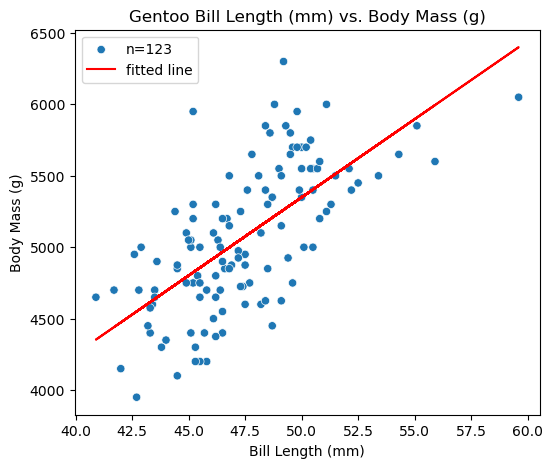

In [20]:
# TODO
# ...

# ---------------------------------------------------------------------------
# Answer
# ---------------------------------------------------------------------------
res = stats.linregress(df_gentoo["bill_length_mm"], df_gentoo["body_mass_g"])
print(res) # print the results

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
g = sns.scatterplot(
    data=df_gentoo,
    x="bill_length_mm",
    y="body_mass_g",
    hue="species",
    legend=False,
    label=f"n={df_gentoo.shape[0]}", # display the number of individuals
)
ax.set_title("Gentoo Bill Length (mm) vs. Body Mass (g)")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Body Mass (g)")

x = df_gentoo["bill_length_mm"]
ax.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

ax.legend()

plt.show()